# Solución general de una ecuación de Laplace con condiciones de Dirichlet


In [1]:
#Librerias
import sympy
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
import math
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
#Para expresar en latex
from sympy.abc import x, y, z,w,m
from sympy import init_printing
init_printing(use_latex="mathjax")
from sympy import latex

In [14]:
#Estas son las condiciones de frontera
#Parametros iniciales
a = 1
b = 1
d_bw_points=0.02

#Frontera Inferior
def f1(x):
    fInf = sympy.sin(7*sympy.pi*x)
    return fInf

#Frontera Superior
def f2(x):
    fSup = sympy.sin(sympy.pi*x)
    return fSup

#Frontera izquierda
def g1(y):
    gLeft = sympy.sin(3*sympy.pi*y)
    return gLeft

#Frontera derecha
def g2(y):
    gRight = sympy.sin(6*sympy.pi*y)
    return gRight


In [15]:
#pi como número
pi = float(sympy.pi)
#Numero de terminos en la suma. Suficientes para que sea un calculo bueno
N = 100

#numpy arrays de los puntos a calcular
x = np.arange(0,a,d_bw_points)
y = np.arange(0,b,d_bw_points)
X,Y = np.meshgrid(x,y)

#Funciones con los coeficientes que tienen la integral
def A(n,a,b):
    x = sympy.Symbol("x")
    integra = sympy.integrate((f1(x)*sympy.sin(n*pi*x/a)),(x,0,a))
    A_n = 2*integra/(a*sympy.sinh(n*pi*b/a))
    return float(A_n)

def B(n,a,b):
    x = sympy.Symbol("x")
    integra = sympy.integrate((f2(x)*sympy.sin(n*pi*x/a)),(x,0,a))
    B_n = 2*integra/(a*sympy.sinh(n*pi*b/a))
    return float(B_n)

def C(n,a,b):
    y = sympy.Symbol("y")
    integra = sympy.integrate((g1(y)*sympy.sin(n*pi*y/b)),(y,0,b))
    C_n = 2*integra/(b*sympy.sinh(n*pi*a/b))
    return float(C_n)

def D(n,a,b):
    y = sympy.Symbol("y")
    integra = sympy.integrate((g2(y)*sympy.sin(n*pi*y/b)),(y,0,b))
    D_n = 2*integra/(b*sympy.sinh(n*pi*a/b))
    return float(D_n)

#La solución de la ecuación sumando las aportaciones de las 4 paredes
def u(x,y):
    suma=0
    for n in range(1,N):
        sumaA = A(n,a,b)*np.sin(n*pi/a*x)*np.sinh(n*pi/a*(b-y))
        sumaB = B(n,a,b)*np.sin(n*pi/a*x)*np.sinh(n*pi/a*y)
        sumaC = C(n,a,b)*np.sinh(n*pi/b*(a-x))*np.sin(n*pi/b*y)
        sumaD = D(n,a,b)*np.sinh(n*pi/b*x)*np.sin(n*pi/b*y)
        suma += sumaA + sumaB + sumaC + sumaD
    return suma

g=u(X,Y)




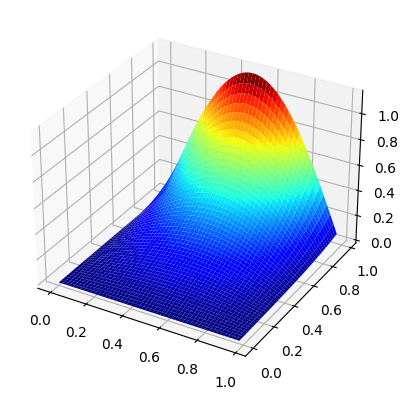

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")

#g=u(X,Y)
ax.plot_surface(X, Y, g,cmap="jet")
#Modificar aquí si se cambia la max y min temp en el code block 2
#ax.set_zlim(-1.5,1.5)
fig.savefig("3D.png")

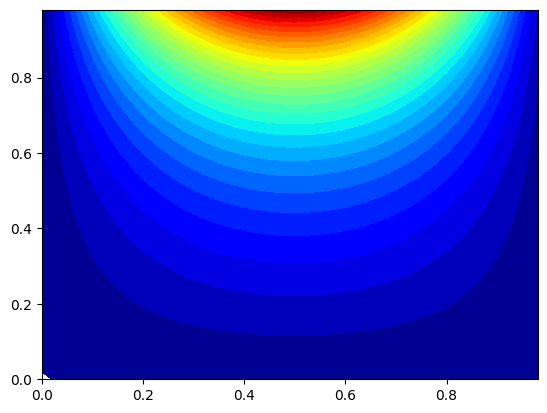

In [17]:
#Contorno
fig = plt.figure()
ax = fig.add_subplot(111)

cont=ax.contourf(X, Y, g,30,cmap="jet")
#Modificar aquí si se cambia la max y min temp en el code block 2
#cont.set_clim(vmin=0, vmax=1)
plt.show()
fig.savefig("2D.png")

In [12]:
#Bloc para expresiones en latex
pi=sympy.pi

def A(a,b):
    x = sympy.Symbol("x")
    integra = sympy.integrate((f1(x)*sympy.sin(m*pi*x/a)),(x,0,a))
    A_m = 2*integra/(a*sympy.sinh(m*pi*b/a))
    return A_m

def B(a,b):
    x = sympy.Symbol("x")
    integra = sympy.integrate((f2(x)*sympy.sin(m*pi*x/a)),(x,0,a))
    B_m = 2*integra/(a*sympy.sinh(m*pi*b/a))
    return B_m

def C(a,b):
    y = sympy.Symbol("y")
    integra = sympy.integrate((g1(y)*sympy.sin(m*pi*y/b)),(y,0,b))
    C_m = 2*integra/(b*sympy.sinh(m*pi*a/b))
    return C_m

def D(a,b):
    y = sympy.Symbol("y")
    integra = sympy.integrate((g2(y)*sympy.sin(m*pi*y/b)),(y,0,b))
    D_m = 2*integra/(b*sympy.sinh(m*pi*a/b))
    return D_m
print("El coeficiente A está dado por:")
print(latex(A(a,b)))
print("\n\rEl coeficiente B está dado por:")
print(latex(B(a,b)))
print("\n\rEl coeficiente C está dado por:")
print(latex(C(a,b)))
print("\n\rEl coeficiente D está dado por:")
print(latex(D(a,b)))

El coeficiente A está dado por:
\frac{2 \left(\begin{cases} - \frac{1}{2} & \text{for}\: m = -7 \\\frac{1}{2} & \text{for}\: m = 7 \\- \frac{7 \sin{\left(\pi m \right)}}{\pi m^{2} - 49 \pi} & \text{otherwise} \end{cases}\right)}{\sinh{\left(\pi m \right)}}

El coeficiente B está dado por:
\frac{2 \left(\begin{cases} - \frac{1}{2} & \text{for}\: m = -1 \\\frac{1}{2} & \text{for}\: m = 1 \\- \frac{\sin{\left(\pi m \right)}}{\pi m^{2} - \pi} & \text{otherwise} \end{cases}\right)}{\sinh{\left(\pi m \right)}}

El coeficiente C está dado por:
\frac{2 \left(\begin{cases} - \frac{1}{2} & \text{for}\: m = -3 \\\frac{1}{2} & \text{for}\: m = 3 \\- \frac{3 \sin{\left(\pi m \right)}}{\pi m^{2} - 9 \pi} & \text{otherwise} \end{cases}\right)}{\sinh{\left(\pi m \right)}}

El coeficiente D está dado por:
\frac{2 \left(\begin{cases} - \frac{1}{2} & \text{for}\: m = -6 \\\frac{1}{2} & \text{for}\: m = 6 \\\frac{6 \sin{\left(\pi m \right)}}{\pi m^{2} - 36 \pi} & \text{otherwise} \end{cases}\right)}{\sinh

El coeficiente A está dado por:
$$\frac{2 \left(\begin{cases} - \frac{1}{2} & \text{for}\: m = -7 \\\frac{1}{2} & \text{for}\: m = 7 \\- \frac{7 \sin{\left(\pi m \right)}}{\pi m^{2} - 49 \pi} & \text{otherwise} \end{cases}\right)}{\sinh{\left(\pi m \right)}}$$

El coeficiente B está dado por:
$$\frac{2 \left(\begin{cases} - \frac{1}{2} & \text{for}\: m = -1 \\\frac{1}{2} & \text{for}\: m = 1 \\- \frac{\sin{\left(\pi m \right)}}{\pi m^{2} - \pi} & \text{otherwise} \end{cases}\right)}{\sinh{\left(\pi m \right)}}$$

El coeficiente C está dado por:
$$\frac{2 \left(\begin{cases} - \frac{1}{2} & \text{for}\: m = -3 \\\frac{1}{2} & \text{for}\: m = 3 \\- \frac{3 \sin{\left(\pi m \right)}}{\pi m^{2} - 9 \pi} & \text{otherwise} \end{cases}\right)}{\sinh{\left(\pi m \right)}}$$

El coeficiente D está dado por:
$$\frac{2 \left(\begin{cases} - \frac{1}{2} & \text{for}\: m = -6 \\\frac{1}{2} & \text{for}\: m = 6 \\\frac{6 \sin{\left(\pi m \right)}}{\pi m^{2} - 36 \pi} & \text{otherwise} \end{cases}\right)}{\sinh{\left(\pi m \right)}}$$



La expresión de u(x,y) sería

$$u(x,y)= \sum_{n=1}^\infty{H_n(7)\sin{\frac{n\pi}{a}x}\sinh{\frac{n\pi}{a}(b-y)}}$$

dónde:
$$H_m(k)=\frac{2 \left(\begin{cases} - \frac{1}{2} & \text{for}\: m = -k \\\frac{1}{2} & \text{for}\: m = k \\\frac{k \sin{\left(\pi m \right)}}{\pi m^{2} - k^2 \pi} & \text{otherwise} \end{cases}\right)}{\sinh{\left(\pi m \right)}}$$

